### SGD (확률적 경사하강법) 

초기에 설정한 학습률을 이용하여 손실함수의 값이 최소가 되는 방향으로 가중치를 업데이트함 

### SGD의 문제점

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbdix42%2Fbtq0JwMbXes%2FnVgettHCydiIvbYluOwrQ0%2Fimg.png" width="500" height="300"/> 

 loss 함수가 $f(x, y) = x2+y2$
같은 그래프라면 아래쪽으로 볼록한 공간의 그래프가 나올 것이다. 이 때 x와 y에 대하여 dx, dy 2가지의 도함수가 있을 것이고, 이 두 벡터의 합방향으로 gradient는 개선될 것이다. 수평방향으로는 기울기 변화가 작고, 수직방향(파란색 긴 화살표)은 위아래방향이기 때문에 기울기변화가 가파르다. 이 두벡터의 합방향으로 움직여야 하므로 바로 가파른 방향으로 내려가지 못하고 약간 사선으로 지그재그하면서 가장 아래 최저점에 도달하게 된다.


local minima와 saddle point 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fk7sG2%2Fbtq0NwEG7cc%2FCgSkOxmOqxcZdyEpiv0RG0%2Fimg.png" width="500" height="300"/> 


local minima 문제의 경우 loss 함수에 기울기가 0인 부분이 있는 경우, 더 이상 가중치 업데이트가 되지 않고 멈춰버리게 된다. (x += learning_rate * dx 에서 dx가 한번 0이 되면, 그 지점을 벗어나지 못하게 된다. 더 내려가면 loss의 최저점이 있는데, 그 전에 멈춰버리는 문제가 발생 

saddle point 문제의 경우 고차원 그래프에서 흔히 생기는 문제로 기울기가 0은 아니지만 주변이 완만해서 가중치 업데이트가 느리게 진행되고 그 곳에 안주하게 되는 문제이다. 

SGD가 갖고 있는 문제점을 보완하기 위해 momentum을 추가   
과거에 이동했던 방식을 기억하면서 그 방향으로 일정 정도를 추가적으로 이동하는 방식

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIEj4r%2Fbtq0LOlwwdT%2FMMLXkWQW9daKbg61esnAnK%2Fimg.png" width="500" height="300"/> 

가중치 x를 업데이트 할때 속도 vx의 개념이 추가 됨 ,모멘텀은 물리에서 운동량의 개념이다. 공이 언덕을 내려오다가 기울기가 0인 지점을 만났더라도 이때까지 내려오던 속도에 의해 그 골짜기를 지나 계속 굴러갈 수 있을 것이다. 경사를 내려가면서 우리가 만든 이 속도 벡터를 가지게 된다. 이것이 minima, saddle을 지나가도록 해 주고 아래로 이동하게 해준다. poor conditionin에서 무슨 일이 벌어지는 지를 생각해 보면, 만약  경사에 대한 이런 지그재그한 추정을 가지려고 한다면,모멘텀을 사용하면 그 지그재그는 서로 서로를 꽤 빠르게 지워서 없어지게 한다. 이건 효과적으로 우리가 민감한 방향으로 움직이는 양을 줄일 것입니다. 반면에, 수평 방향으로는 우리의 속도는 계속해서 커질 거고 덜 민감한 차원을 가로질러 하강을 더 가속화할 것이다. 여기에 모멘텀을 더하는 것도 역시 이 high condition number problem에 도움을 준다. 



t → t+1 지점으로  이동한다고 가정하자.

* 속도 업데이트 

  → t+1지점에서의 속도를 직전단계인 t지점에서의 속도를 기반으로 예측

한다. 
v
+
t
+
1
은  직전지점에서의 속도 
v
t
와 기울기를 고려하여 업데이트하고, 이 때 기울기가 너무 빠르게 변하는 것을 제한하기 위해 마찰계수 
ρ (rho)를 적용하게 된다. rho는 경험적으로 0.99나 0.9를 사용한다고 한다.

* 가중치업데이트

  → loss함수에서 t+1지점은 최종적으로 직전지점 
x
t
에서 학습률 
α
와 t+1지점에서의 예측속도를 고려해 업데이트 된다.


Nesterov Momentum 
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbZqGwu%2Fbtq0LOeO7E0%2FvKYOkoHEIUEvZKLT9N5zf0%2Fimg.png" width="500" height="300"/> 

Momentum 방식에서는 이동 벡터 v 를 계산할 때 현재 위치에서의 gradient와 momentum step을 독립적으로 계산하고 합친다. 반면, Nesterov Momentum 에서는 momentum step을 먼저 고려하여, momentum step을 먼저 이동했다고 생각한 후 그 자리에서의 gradient를 구해서 gradient step을 이동한다. 

Momentum 방식에 비해 보다 효과적으로 이동할 수 있다. Momentum 방식의 경우 멈춰야 할 시점에서도 관성에 의해 훨씬 멀리 갈수도 있다는 단점이 존재하는 반면, Nesterov Momentum 방식의 경우 일단 모멘텀으로 이동을 반정도 한 후 어떤 방식으로 이동해야할 지를 결정한다. 따라서 Momentum 방식의 빠른 이동에 대한 이점은 누리면서도, 멈춰야 할 적절한 시점에서 제동을 거는 데에 훨씬 용이하다고 생각할 수 있을 것이다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcPscVC%2Fbtq0LOsomty%2FgTygqgNIDEpvPc22tW1z81%2Fimg.png" width="500" height="300"/> 


AdaGrad   

Adagrad(Adaptive Gradient)는 변수들을 update할 때 각각의 변수마다 step size를 다르게 설정해서 이동하는 방식이다.알고리즘의 기본적인 아이디어는 ‘지금까지 많이 변화하지 않은 변수들은 step size를 크게 하고, 지금까지 많이 변화했던 변수들은 step size를 작게 하자’ 라는 것이다. 

자주 등장하거나 변화를 많이 한 변수들의 경우 optimum에 가까이 있을 확률이 높기 때문에 작은 크기로 이동하면서 세밀한 값을 조정하고, 적게 변화한 변수들은 optimum 값에 도달하기 위해서는 많이 이동해야할 확률이 높기 때문에 먼저 빠르게 loss 값을 줄이는 방향으로 이동하려는 방식이라고 생각할 수 있겠다.

특히 word2vec이나 GloVe 같이 word representation을 학습시킬 경우 단어의 등장 확률에 따라 variable의 사용 비율이 확연하게 차이나기 때문에 Adagrad와 같은 학습 방식을 이용하면 훨씬 더 좋은 성능을 거둘 수 있을 것이다.

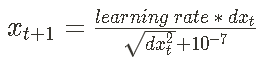

dx의 제곱에 루트를 씌운 값을 x값 업데이트할때 나눠주는 방식이다.

- 여기서 1e -7 값은 0으로 나눠주는 것을 방지하는 아주 작은 값이다.

- grad_squared (cache라고도 함)는 제곱값으로 무조건 양수이고, 계속 이전의 값이 누적되어 증가하게 된다.
- 문제점 cache값이 계속 누적됨으로 인해 뉴럴네트워크의 학습이 진행되다보면 가중치가 0이 되어 학습이 종료될 수 있다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FDR6ZT%2Fbtq0OkjMIHJ%2FWnZLlNxNQpXiVCktIKuKuk%2Fimg.png" width="500" height="300"/> 

AdaGrad의 단점을 보완하기 위해 제안된 방법이다. 누적된 grad_squared항에 decay_rate를 곱하고, 현재의 dx항에는 (1-decay_rate)를 곱해 grad_squared가 누적되는 속도를 줄여준다. 

- 보통 decay_rate는 0.9나 0.99를 사용한다.

## Adam 

Adam (Adaptive Moment Estimation)은 RMSProp과 Momentum 방식을 합친 것 같은 알고리즘이다. 이 방식에서는 Momentum 방식과 유사하게 지금까지 계산해온 기울기의 지수평균을 저장하며, RMSProp과 유사하게 기울기의 제곱값의 지수평균을 저장한다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbcweDa%2Fbtq0PcTBlH4%2F1tSsGjajt6J9yz8sqwZTI0%2Fimg.png" width="500" height="300"/> 


------ 

### 수식  
$m_{t} = \beta_{1} m_{t-1} + (1 - \beta_{1}) \nabla f(x_{t-1})$  
$g_{t} = \beta_{2} g_{t-1} + (1-\beta_{2})(\nabla f(x_{t-1}))^{2}$  

$\hat{m_{t}} = \frac{m_{t}}{1-\beta^{t}_{1}}, \hat{g_{t}} = \frac{g_{t}}{1-\beta^{t}_{2}} $  

$ x_{t} = x_{t-1} - \frac{\eta}{\sqrt{\hat{g_{t}} + \epsilon}} \cdot \hat{m_{t}}$ 

* B1 - Momentum의 지수이동평균 $\approx$ 0.9
* B1 - RMSProp의 지수이동평균 $\approx$ 0.999
* $ \hat{m} ,\hat{g_{t}}$ 학습 초기 시 mt, gt가 0이 되는 것을 방지하기 위한 보정 값 
* $\epsilon$ 분모가 0이 되는 것을 방지하기 위한 작은 값  $\approx 10^{-8} $ 
* $ \eta$ 학습률 

### 최적의 학습률 

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FPbLej%2FbtqNRJdG4rg%2FF8rGxLnX34yYuRJQgNZIX0%2Fimg.png" width="500" height="300"/> 


위의 모든 경사하강법 알고리즘은 학습률을 하이퍼파라미터로 갖는다.

- 최선의 방법은 초기에 큰 학습률을 사용해 빠르게 최소 loss로 수렴하도록 하고, 뒤로 갈수록 학습률을 낮추는 방식이다.

1) step decay  : epoch을 돌 때마다 일정한 간격으로 학습률을 감소시킨다.

2) exponential decay , 1/t decay 등이 있는데 현실적으로는 exponential decay를 많이 사용한다.

 기본적으로 최적화 알고리즘은 1차 미분을 활용한 방법이였다. 기울기 정보를 이용해서 손실함수를 선형 함수로 근사(1차 테일러 근사) 시킨다. 1차 근사함수를 실제 손실함수라고 가정하고 step을 내려가지만 이 근사함수로는 멀리갈 수 없다. 
 
위의 문제를 해결하기 위해 2차 근사(second-order apporoximation)의 정보를 추가적으로 활용하여 minima에 근접하도록 한다. 2차 근사를 이용한 함수는 2차 테일러 근사 함수이고, 이 함수는 2차 함수의 모양을 가진다. **2차 미분한 함수는 기울기의 변화율을 알 수 있으므로 그 점이 변곡점인지, minima인지 알 수 있다.**


<img src="
https://velog.velcdn.com/images%2Fguide333%2Fpost%2F7cf9db82-4cd5-4fb7-8e65-25f721e7938b%2FScreenshot%20from%202021-02-19%2016-09-18.png" width="500" height="300"/> 


위의 예시를 다차원으로 확장시킨 것이 'Newton step'이다. 2차 미분값들로 된 행렬인 Hessian matrix를 계산하고, Hessian matrix의 역행렬을 이용하면 실제 손실함수의 2차 근사를 이용해 minima로 바로 이동할 수 있다.


이론적으로 "Newton's method" 에서는 learning rate는 필요없고, 매 step마다 항상 minima를 향해 이동한다. 그러나 실제로는 2차 근사도 사실상 완벽하지 않기 때문에 learning rate가 필요하다. Newton's method는 minima로 이동하는게 아니라 'minima의 방향'으로 이동하기 때문

이론적으로 Newton's method에서는 learning rate가 필요하지 않다. 그러나 안타깝게도 Newton's method는 Deep learning에서 사용할 수 없다. 왜냐하면 Hessian matrix는 N x N 행렬(N: Network의 파라미터 수)이므로 N이 1억이면 1억의 제곱만큼 존재한다. 이를 메모리에 저장할 방법은 없고 역행렬 계산도 불가능

따라서 실제로는 'Quasi-Newton methods'를 이용한다. Quasi-Newton methods는 Full Hessian을 근사시킨다. 즉 Low-rank approximations 하는 방법이다.

<img src="
https://velog.velcdn.com/images%2Fguide333%2Fpost%2Ff9f4f5c1-9cdf-4013-877d-a6df98eda236%2FScreenshot%20from%202021-02-19%2016-09-33.png" width="500" height="300"/> 



## Ensembles 

train/test error의 격차를 줄이는 가장 빠르고 쉬운 길은 바로 모델 앙상블이다. 모델 앙상블은 n개의 모델을 독립적으로 학습시키고 n개 모델 결과의 평균을 이용한다. 모델의 수가 늘어날수록 overfitting 줄어들고 성능이 조금씩(2%정도) 향상된다. ImageNet 같은 대회에서는 모델의 성능을 최대화시키기 위해 앙상블 기법을 사용하기도 한다.

<img src="
https://velog.velcdn.com/images%2Fguide333%2Fpost%2F112afd85-b813-4184-a296-9c364af068f8%2FScreenshot%20from%202021-02-19%2016-10-25.png" width="500" height="300"/> 


더 좋은 방법으로는 학습 도중 중간 모델들을 저장(snapshots)하여 앙상블로 사용하고, Test time에는 여러 snapshots에서 나온 예측값들을 평균을 내서 사용하는 방법이 있다. 이런 앙상블 기법은 모델을 한 번만 Train시켜도 좋은 성능을 얻을 수 있게 한다.

모델간의 Loss 차이가 크면 한쪽이 overfiting일 수 있으니 별로 안좋고, 또 차이가 작아도 안 좋을 것 같다. 그러므로 좋은 앙상블 결과를 위해서 모델 간의 최적의 갭을 찾는 것이 중요하지 않을까?라는 질문의 답은 validation set의 성능을 최대화시키는 것이다. 따라서 우선 loss gap을 신경쓰지 않고 모델을 조금 더 Overfitting 시킬 수 있다면 좋은 성능을 낼 수 있을 것이다. validation set 성능과 이 갭 사이에는 묘한 관계가 있지만 Validation set 성능만 신경쓰면 된다.

앙상블 모델마다 하이퍼파라미터를 동일하게 정하는가의 질문에는 다르게 정할 수도 있다라고 대답할 수 있다. 다양한 "모델 사이즈", "learning rate", 그리고 "다양한 regularization 기법" 등을 앙상블할 수 있다.



